# Word2vec

In [ ]:
#import sys
#!conda install --yes --prefix {sys.prefix} gensim

In [200]:
sentences = [['this', 'is', 'a', 'first', 'example', 'of', 'text'],
    ['this', 'is', 'the', 'second', 'example'],
    ['yet', 'another', 'example'],
    ['one', 'more', 'example'],
    ['and', 'the', 'final', 'example']]

In [201]:
from gensim.models import Word2Vec

model = Word2Vec(sentences, min_count=1, size=10,window=3)
print(model)


Word2Vec(vocab=15, size=10, alpha=0.025)


In [202]:
words = list(model.wv.vocab)
print(words)



['this', 'is', 'a', 'first', 'example', 'of', 'text', 'the', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [204]:

print("v(final)="+str(model.wv['final']))

# save model
model.save('model.bin')

v(final)=[-0.04450522 -0.04468255  0.04549608  0.04298965  0.04439742 -0.04225256
  0.00168646 -0.04427767 -0.01024379  0.00958673]


In [205]:
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=15, size=10, alpha=0.025)


In [171]:
X = model.wv[new_model.wv.vocab]

In [163]:
X.shape

(15, 10)

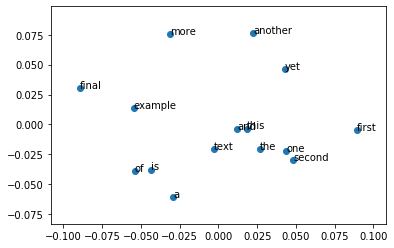

In [206]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

In [207]:
import gensim.downloader as api

In [208]:
corpus = api.load('text8')

In [209]:
type(corpus)

text8.Dataset

In [210]:
from gensim.models.word2vec import Word2Vec
model8= Word2Vec(corpus)

In [211]:
model8.wv['tree']

array([-2.5352533 , -1.6290882 ,  1.1796577 ,  1.9012558 ,  0.41124827,
       -0.7731007 , -0.85539466,  2.0098171 ,  0.05400473,  0.8147159 ,
       -0.8150351 , -1.222414  ,  1.1258707 ,  0.8628559 , -0.08012119,
        0.83586633,  0.4928995 ,  0.849961  ,  0.7126838 ,  2.697887  ,
        1.2671543 , -1.183194  ,  2.0053384 , -0.16189653,  0.2617844 ,
        1.2763937 ,  0.35574543, -0.1391968 , -3.8584297 , -2.196346  ,
        0.8625773 ,  1.5349872 , -1.1146197 , -0.0282496 ,  0.40370774,
       -0.11793032,  1.5628953 , -0.05153443, -0.32379797, -1.618734  ,
       -0.77597827,  0.85661   ,  2.044874  ,  1.7085441 ,  1.3780435 ,
       -1.3055445 , -0.3943222 , -0.6457033 ,  1.4470626 ,  1.1821789 ,
        0.529086  , -1.3683584 ,  1.2905694 , -0.08058481,  0.11167571,
        0.8139906 ,  1.8663299 ,  1.9893886 ,  1.1515743 ,  1.0156292 ,
       -1.6896203 , -2.5307298 , -1.4655198 ,  1.4481344 , -0.80688894,
       -0.14187169, -0.09058347, -0.81768024,  0.07064059, -0.55

In [212]:
print(model8.wv.most_similar('tree'))

[('trees', 0.6981440782546997), ('bark', 0.6837161779403687), ('leaf', 0.6654955148696899), ('bird', 0.6150989532470703), ('flower', 0.6119370460510254), ('avl', 0.5995259284973145), ('fruit', 0.5961179137229919), ('pond', 0.5822395086288452), ('vine', 0.5795713663101196), ('cave', 0.5774624347686768)]


In [214]:
print(model8.wv.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


# Analogies

In [ ]:
v(king)-v(man)+v(woman)

In [219]:
print(model8.wv.most_similar(positive=['italy', 'renault'], negative=['france'], topn=3))


[('benz', 0.7016667127609253), ('mclaren', 0.6646001935005188), ('mercedes', 0.6463009715080261)]


In [217]:
print(model8.wv.most_similar(positive=['france', 'venice'], negative=['italy'], topn=3))


[('paris', 0.718423068523407), ('toulouse', 0.7165618538856506), ('strasbourg', 0.7047515511512756)]


In [218]:
print(model8.wv.most_similar(positive=['usa', 'beatles'], negative=['england'], topn=3))

[('garth', 0.6099179983139038), ('lisa', 0.6087814569473267), ('dj', 0.606204628944397)]


In [222]:
model8.wv.most_similar(['apple','orange'])

[('jaguar', 0.6370922327041626),
 ('lotus', 0.6322891712188721),
 ('lemon', 0.6194930076599121),
 ('logo', 0.6023187637329102),
 ('grille', 0.5983625650405884),
 ('vw', 0.5982217788696289),
 ('mcintosh', 0.5879508256912231),
 ('aqua', 0.5862189531326294),
 ('lynx', 0.5758203268051147),
 ('iie', 0.5740398168563843)]

##  Loading pre-trained models

In [225]:
# Load pretrained model GoogleNews-vectors-negative300.bin.gz
# https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [228]:
print(model.most_similar('tree'))

[('trees', 0.8293122053146362), ('pine_tree', 0.7622087001800537), ('oak_tree', 0.731893002986908), ('evergreen_tree', 0.6926872730255127), ('fir_tree', 0.6917217969894409), ('willow_tree', 0.6845874190330505), ('pine_trees', 0.6824266910552979), ('maple_tree', 0.6803498268127441), ('sycamore_tree', 0.6681811213493347), ('tress', 0.6547873020172119)]


In [197]:
print(model.most_similar(positive=['germany', 'monarchy'], negative=['netherlands'], topn=3))


[('Monarchy', 0.4897083640098572), ('constitutional_monarchy', 0.48723936080932617), ('royalists', 0.45945388078689575)]


In [119]:
print(model.most_similar(positive=['italy', 'england'], negative=['beatles'], topn=3))


[('juve', 0.6002182960510254), ('spain', 0.5989649295806885), ('lazio', 0.5795004963874817)]


## Glove

In [227]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.42B.300d.txt'
word2vec_output_file = 'glove.42B.300d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(1917494, 300)

In [229]:
from gensim.models import KeyedVectors

filename = 'glove.42B.300d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7833545804023743)]


In [ ]:
print(model.most_similar('tree'))